In [13]:
!pip install tensorflow


### Project Rules
##### Each step, you test a specific parameter first then after finding the best value, use it in the next steps to find the best of the other parameters
<small>
  * Data must be shuffled first <br>
  *   batch size > 30<br>
  *   start with RelU<br>
  * number of layers > 3<br>
  * 2D max pooling layer - 2x2 stride - 2x2 kernel size<br>
  * optimizer -> stochastic gradient descent with any initial learning rate<br>
  * do not use more than 3 CNN layers in any model<br>
  * do not use more than 4 FC (fully connected) layers<br>
  * start with batch size = 32 or 64 (how many samples model looks at before updating weights)<br>
  * number of epochs >= 10  and <=25 maybe (an epoch is one complete pass on the data)<br>
  * test with double the batch size AND ( triple OR 4 times)<br>
  * use atleast 3 other activation functions<br>
  * with best settings reached -> try 2 more optimizers<br>
  * put dropout layer anywhere and test 2 different places and different dropout rates<br>
  * data input should be 28x28<br>
  * output layer size = 10 (corresponding to the different classes)<br>
  * mnist dataset<br>
  * cross entropy loss
</small>


In [29]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_valid_cnn = X_valid.reshape(-1, 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(-1, 28, 28, 1).astype('float32')

y_train_cnn = y_train
y_valid_cnn = y_valid
y_test_cnn = y_test

print("Train images shape:       ",X_train.shape)
print("Train labels shape:       ",y_train.shape)
print("Validation images shape:  ",X_valid.shape)
print("Validation labels shape:  ",y_valid.shape)
print("Test images shape:        ",X_test.shape)
print("Test labels shape:        ",y_test.shape)
print("Train CNN images shape:       ",X_train_cnn.shape)
print("Train CNN labels shape:       ",y_train_cnn.shape)

Train images shape:        (48000, 28, 28, 1)
Train labels shape:        (48000,)
Validation images shape:   (12000, 28, 28, 1)
Validation labels shape:   (12000,)
Test images shape:         (10000, 28, 28, 1)
Test labels shape:         (10000,)
Train CNN images shape:        (48000, 28, 28, 1)
Train CNN labels shape:        (48000,)


### Visualizing the Data

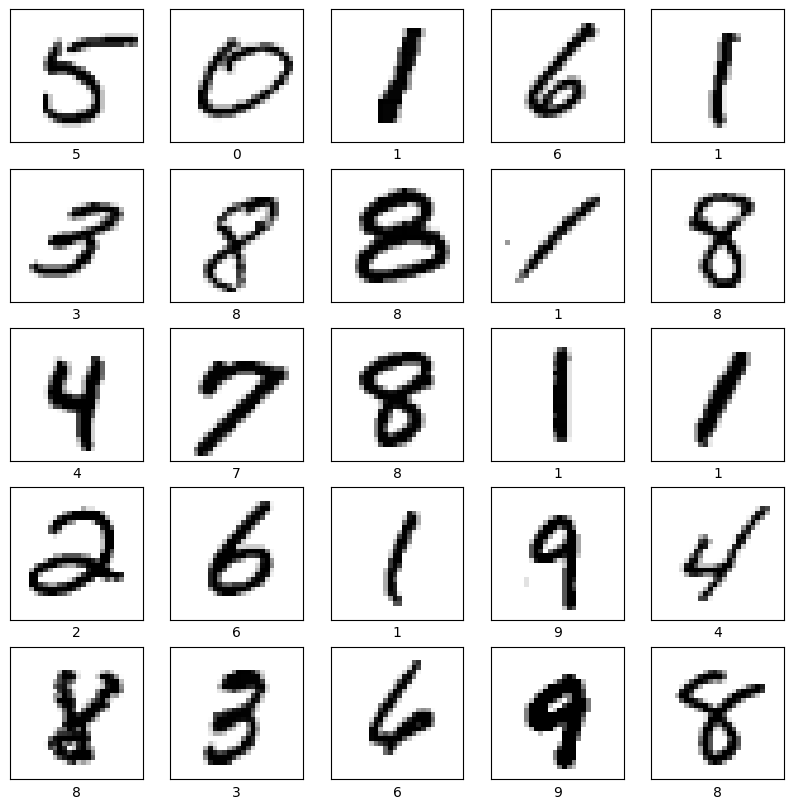

In [15]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [30]:
#convert from int to float to prepare for normalization
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

#normalizes data to have mean = 0 and std = 1

mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train-mean)/(std + 1e-7)
X_valid = (X_valid-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)
print("Train images shape:       ",X_train.shape)
# print("Train labels shape:       ",y_train.shape)
#converts digit labels into vector
#needed for softmax and categorical crossentropy

mean = np.mean(X_train_cnn)
std = np.std(X_train_cnn)
X_train_cnn = (X_train_cnn - mean) / (std + 1e-7)
X_valid_cnn = (X_valid_cnn - mean) / (std + 1e-7)
X_test_cnn = (X_test_cnn - mean) / (std + 1e-7)
print("Train images shape:       ",X_train_cnn.shape)

y_train_cnn = to_categorical(y_train_cnn, 10)
y_valid_cnn = to_categorical(y_valid_cnn, 10)
y_test_cnn = to_categorical(y_test_cnn, 10)
print("Train labels shape:       ",y_train_cnn.shape)
print("Validation labels shape:  ",y_valid_cnn.shape)
print("Test labels shape:        ",y_test_cnn.shape)

y_train = to_categorical(y_train,10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

Train images shape:        (48000, 28, 28, 1)
Train images shape:        (48000, 28, 28, 1)
Train labels shape:        (48000, 10)
Validation labels shape:   (12000, 10)
Test labels shape:         (10000, 10)


# ANN Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
import time

X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

model = Sequential([
    Dense(512, activation='relu', input_shape=X_train.shape[1:]),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

batch_size = 64
epochs = 12
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1= 0.9 ,beta_2= 0.999, epsilon=1e-07)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Test and measure time
test_times = []
train_times = []
val_accuracies = []
for e in range(epochs):
      print(f"\nEpoch {e+1}/{epochs}")

      train_start = time.time()
      history = model.fit(
             X_train, y_train,
             validation_data=(X_valid, y_valid),
             epochs=1,
             batch_size=batch_size,
            #  callbacks=[reduce_lr, early_stopping],
             verbose=2
       )
      train_end = time.time()
      train_duration = train_end - train_start
      train_times.append(train_duration)
      val_accuracies.append(history.history['val_accuracy'][0])

      start = time.time()
      model.evaluate(X_test, y_test, verbose=0)
      end = time.time()
      test_duration = end - start
      test_times.append(end - start)



avg_train_time = np.mean(train_times)
avg_test_time = np.mean(test_times)



final_test_loss, final_test_acc = model.evaluate(X_test, y_test, verbose=0)

model.summary()

print("\n--- ANN Results ---")
print(f"Final Test Accuracy: {final_test_acc:.4f}")
print("Validation Accuracy per Epoch (first 5):",
      [f"{acc:.4f}" for acc in val_accuracies[:5]])
print(f"Total Parameters: {model.count_params()}")
print(f"Average Training Time per Epoch: {avg_train_time:.4f} seconds")
print(f"Average Testing Time per Epoch: {avg_test_time:.4f} seconds")
print(f"Layers: Input(784) -> Dense(512, relu) -> Dropout(0.2) -> Dense(256, relu) -> Dense(10, softmax)")
print("Learning Rate Used:", learning_rate)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/12
750/750 - 20s - 27ms/step - accuracy: 0.9279 - loss: 0.2373 - val_accuracy: 0.9630 - val_loss: 0.1195

Epoch 2/12
750/750 - 10s - 13ms/step - accuracy: 0.9636 - loss: 0.1156 - val_accuracy: 0.9718 - val_loss: 0.0967

Epoch 3/12
750/750 - 8s - 11ms/step - accuracy: 0.9730 - loss: 0.0856 - val_accuracy: 0.9712 - val_loss: 0.1048

Epoch 4/12
750/750 - 8s - 11ms/step - accuracy: 0.9779 - loss: 0.0709 - val_accuracy: 0.9771 - val_loss: 0.0838

Epoch 5/12
750/750 - 9s - 12ms/step - accuracy: 0.9808 - loss: 0.0582 - val_accuracy: 0.9759 - val_loss: 0.0884

Epoch 6/12
750/750 - 8s - 11ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9769 - val_loss: 0.0893

Epoch 7/12
750/750 - 12s - 16ms/step - accuracy: 0.9841 - loss: 0.0495 - val_accuracy: 0.9780 - val_loss: 0.0884

Epoch 8/12
750/750 - 9s - 11ms/step - accuracy: 0.9850 - loss: 0.0467 - val_accuracy: 0.9753 - val_loss: 0.0916

Epoch 9/12
750/750 - 9s - 12ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.9799

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)


--- ANN Results ---
Final Test Accuracy: 0.9809
Validation Accuracy per Epoch (first 5): ['0.9630', '0.9718', '0.9712', '0.9771', '0.9759']
Total Parameters: 535818
Average Training Time per Epoch: 11.7459 seconds
Average Testing Time per Epoch: 1.7523 seconds
Layers: Input(784) -> Dense(512, relu) -> Dropout(0.2) -> Dense(256, relu) -> Dense(10, softmax)
Learning Rate Used: 0.001


# SVM Model

In [18]:
import numpy as np
import time
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255.0

X_train_svm, _, y_train_svm, _ = train_test_split(X_train, y_train, train_size=8000, stratify=y_train, random_state=42)
X_test_svm, _, y_test_svm, _ = train_test_split(X_test, y_test, train_size=2000, stratify=y_test, random_state=42)


In [19]:
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', gamma='scale', C=5))
start_train = time.time()
clf.fit(X_train_svm, y_train_svm)
end_train = time.time()
train_time = end_train - start_train

start_test = time.time()
y_pred = clf.predict(X_test_svm)
end_test = time.time()
test_time = end_test - start_test

acc = accuracy_score(y_test_svm, y_pred)

print("\n--- SVM Results ---")
print(f"Test Accuracy: {acc:.4f}")
print(f"Training Time: {train_time:.2f} seconds")
print(f"Testing Time: {test_time:.4f} seconds")


--- SVM Results ---
Test Accuracy: 0.9475
Training Time: 9.99 seconds
Testing Time: 5.9633 seconds


# CNN
* use RelU for now
* 3 layers minimum
* 2D MAX pooling after at least one layer, 2x2 stride, 2x2 kernel
* choose good starting epoch
* optimizer -> SGD
* start with any learning rate
* test different learning rates
* start with batch size = 32, 64

In [20]:
from enum import Enum

class Optimizer(Enum):
    SGD = 'sgd'
    Adam = 'adam'
    RMSprop = 'rmsprop'

class ActivationFunction(Enum):
    ReLU = 'relu'
    Sigmoid = 'sigmoid'
    Tanh = 'tanh'
    Softmax = 'softmax'

#to use -> Optimizer.sgd


In [ ]:
import tensorflow as tf
import time

def CNN(activation_fun, conv_layers, epoch, optimizer, learning_rate, batch_size, fc_layers, fc_size, dropout_rate, dropout_pos=-1):
  model = tf.keras.Sequential()
  if conv_layers > 3:
    print("Too many layers, will create 3 C layers")
  c_layers = 3 if conv_layers > 3 else conv_layers
  if fc_layers > 4:
    print("Too many layers, will create 4 FC layers")
  fc_layers = 4 if fc_layers > 4 else fc_layers

  for i in range(c_layers):
    if i == 0:
      model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding = 'same', activation=activation_fun.value, input_shape=X_train_cnn.shape[1:]))
    else:
      model.add(tf.keras.layers.Conv2D(32, (3,3), (1,1), padding = 'same', activation=activation_fun.value))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'))
  model.add(tf.keras.layers.Flatten())

  for i in range(fc_layers):
    model.add(tf.keras.layers.Dense(fc_size, activation=activation_fun.value))
    if dropout_pos == i:
      model.add(tf.keras.layers.Dropout(dropout_rate))
    # if i == fc_layers - 1:
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer.value, loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  print(X_train_cnn.shape)
  print(y_train_cnn.shape)
  train_times = []
  test_times = []
  for i in range(epoch):
    start = time.time()
    model.fit(X_train_cnn, y_train_cnn, epochs=1, batch_size=batch_size, validation_data=(X_valid_cnn, y_valid_cnn))
    end_time = time.time()
    train_times.append(end_time - start)
    start = time.time()
    test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn)
    end = time.time()
    test_times.append(end - start)
  avg_train = np.mean(train_times)
  avg_test = np.mean(test_times)
  print(f"Total Training time: {np.sum(train_times)} seconds")
  print(f"AVG Training time per epoch: {avg_train} seconds")
  print(f"AVG Testing time per epoch: {avg_test} seconds")

  test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cnn)
  print(f"Test loss: {test_loss*100:.2f}%")
  print(f"Test accuracy: {test_acc*100:.2f}%")

CNN(activation_fun=ActivationFunction.ReLU, conv_layers=3, epoch=10, optimizer=Optimizer.SGD, learning_rate=0.01, batch_size=32, fc_layers=2, fc_size=128, dropout_pos=-1, dropout_rate=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,282 (399.54 KB)

 Trainable params: 102,282 (399.54 KB)

 Non-trainable params: 0 (0.00 B)

(48000, 28, 28, 1)
(48000, 10)
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7193 - loss: 0.8588 - val_accuracy: 0.9651 - val_loss: 0.1187
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9594 - loss: 0.1259
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9651 - loss: 0.1128 - val_accuracy: 0.9762 - val_loss: 0.0790
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9723 - loss: 0.0845
 157/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 0.9715 - loss: 0.0856

### Testing different learning rates

In [ ]:

learning_rates = [0.1, 0.01, 0.001, 0.0001]
results_lr = []

for lr in learning_rates:
    print(f"\n--- Testing Learning Rate: {lr} ---")
    result = CNN(
        activation_fun=ActivationFunction.ReLU,
        conv_layers=3,
        epoch=10,
        optimizer=Optimizer.SGD,
        learning_rate=lr,
        batch_size=32,
        fc_layers=2,
        fc_size=128,
        dropout_rate=0,
        dropout_pos=-1
    )
    results_lr.append(result)

# Print best learning rate
best_lr_result = max(results_lr, key=lambda x: x['final_test_accuracy'])
print(f"\nBest Learning Rate: {best_lr_result['learning_rate']}")
print(f"Best Test Accuracy: {best_lr_result['final_test_accuracy']:.4f}")

# Print results table
print("\nLearning Rate Results Table:")
print("| Learning Rate | Final Test Accuracy | Val Accuracy (First 5 Epochs) | Parameters | Avg Train Time | Avg Test Time |")
print("|---------------|--------------------|------------------------------|------------|----------------|---------------|")
for result in results_lr:
    print(f"| {result['learning_rate']} | {result['final_test_accuracy']:.4f} | {[f'{acc:.4f}' for acc in result['val_accuracies_first_5']]} | {result['total_params']} | {result['avg_train_time']:.4f}s | {result['avg_test_time']:.4f}s |")

###Testing different number of CNN layers and CNN parameters
###Testing different number of FC layers


In [ ]:
# Cell 4: Step 5 - Test Number and Sizes of FC Layers
fc_configs = [
    {'fc_layers': 1, 'fc_size': 128},  # 1 FC layer with 128 units
    {'fc_layers': 2, 'fc_size': 256},  # 2 FC layers, each with 256 units
    {'fc_layers': 3, 'fc_size': 512},  # 3 FC layers, each with 512 units
    {'fc_layers': 2, 'fc_size': 128}   # 2 FC layers, each with 128 units
]

results_fc = []
best_lr = best_lr_result['learning_rate']  # Best learning rate from Step 4

for config in fc_configs:
    print(f"\n--- Testing FC Config: {config['fc_layers']} layers, size {config['fc_size']} ---")
    result = CNN(
        activation_fun=ActivationFunction.ReLU,
        conv_layers=3,
        epoch=10,
        optimizer=Optimizer.SGD,
        learning_rate=best_lr,
        batch_size=32,
        fc_layers=config['fc_layers'],
        fc_size=config['fc_size'],
        dropout_rate=0,
        dropout_pos=-1
    )
    result['fc_config'] = f"{config['fc_layers']} FC (size {config['fc_size']})"
    results_fc.append(result)

# Print best FC configuration
best_fc_result = max(results_fc, key=lambda x: x['final_test_accuracy'])
print(f"\nBest FC Configuration: {best_fc_result['fc_config']}")
print(f"Best Test Accuracy: {best_fc_result['final_test_accuracy']:.4f}")

# Print results table
print("\nFC Configuration Results Table:")
print("| FC Config | Final Test Accuracy | Val Accuracy (First 5 Epochs) | Parameters | Avg Train Time | Avg Test Time |")
print("|----------|--------------------|------------------------------|------------|----------------|---------------|")
for result in results_fc:
    print(f"| {result['fc_config']} | {result['final_test_accuracy']:.4f} | {[f'{acc:.4f}' for acc in result['val_accuracies_first_5']]} | {result['total_params']} | {result['avg_train_time']:.4f}s | {result['avg_test_time']:.4f}s |")

### batch size = 2b

##activation function 1

## activation function 2

#activation function 3


## optimizer 1

##optimizer 2



## dropout layer place 1

## dropout layer place 2